<a href="https://colab.research.google.com/github/FendyDeveloper/Bank-Transaction-Dataset-for-Fraud-Detection/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Fendy_Rahmat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Dataset yang digunakan adalah [Bank Transaction Dataset for Fraud Detection](https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/data) . Dataset ini memiliki fitur numerik dan kategorikal serta tidak memiliki label awal.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [159]:
df = pd.read_csv('bank_transactions_data_2.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [161]:
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX000001,AC00362,NaN,2023-04-11 16:29:14,Debit,Fort Worth,D000697,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


In [162]:
df.isna().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [163]:
# Tinjau jumlah baris dan kolom
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])

# Tinjau jenis data di setiap kolom
print("\nInfo tipe data:")
print(df.dtypes)

Jumlah baris: 2512
Jumlah kolom: 16

Info tipe data:
TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object


In [164]:
# Identifikasi missing values
missing_values = df.isnull().sum()
print("\nJumlah missing values:")
print(missing_values)


Jumlah missing values:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [165]:
# Menghapus kolom yang tidak relevan
df = df.drop(["TransactionID", "AccountID", "DeviceID", "IP Address", "MerchantID"], axis=1)

In [166]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

df["DaysBetweenTransaction"] = (df["PreviousTransactionDate"] - df["TransactionDate"]).dt.days

In [167]:
df = df.drop(['TransactionDate','PreviousTransactionDate'], axis=1)


Statistik Deskriptif Variabel Numerik:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  DaysBetweenTransaction  
count     2512.000000             2512.000000  
mean      5114.302966              486.857882  
std       3900.942499              106.378910  
min        101.250000              307.000000  
25%       1504.370000     

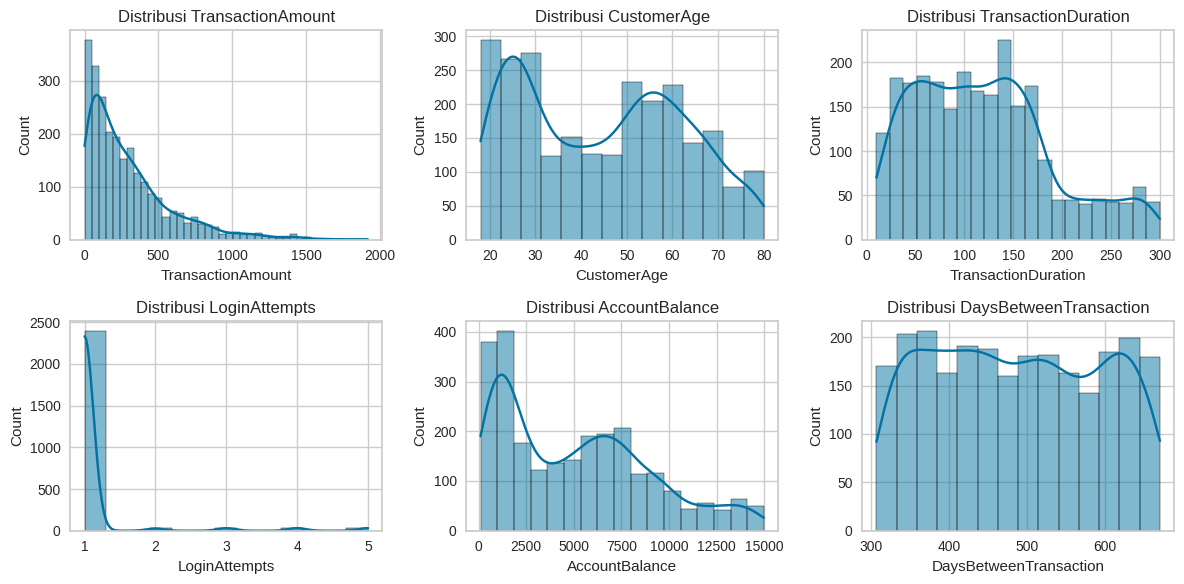

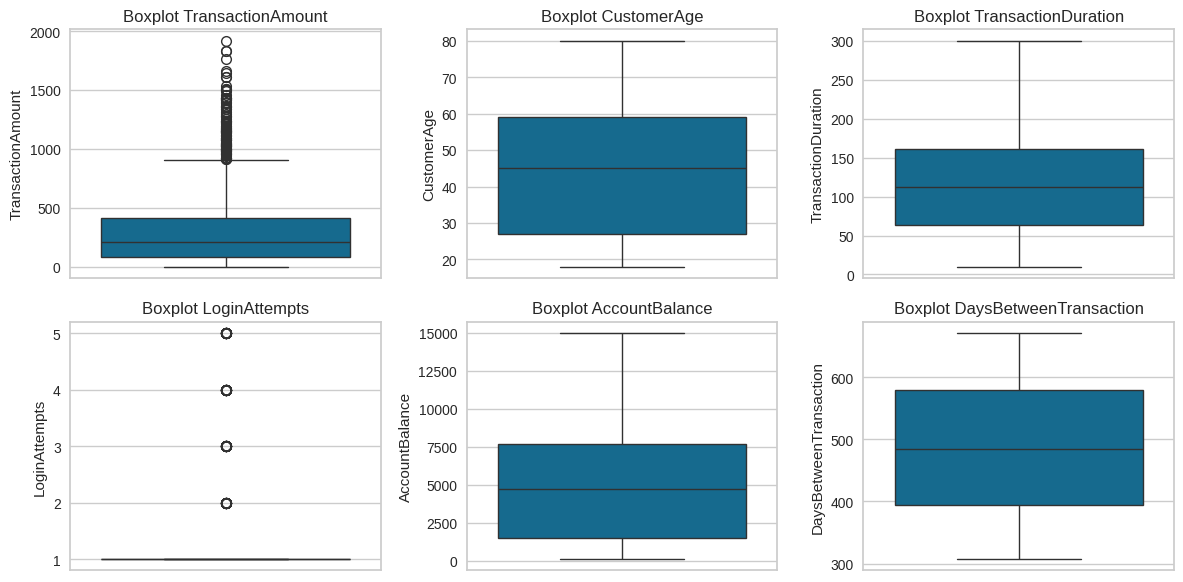

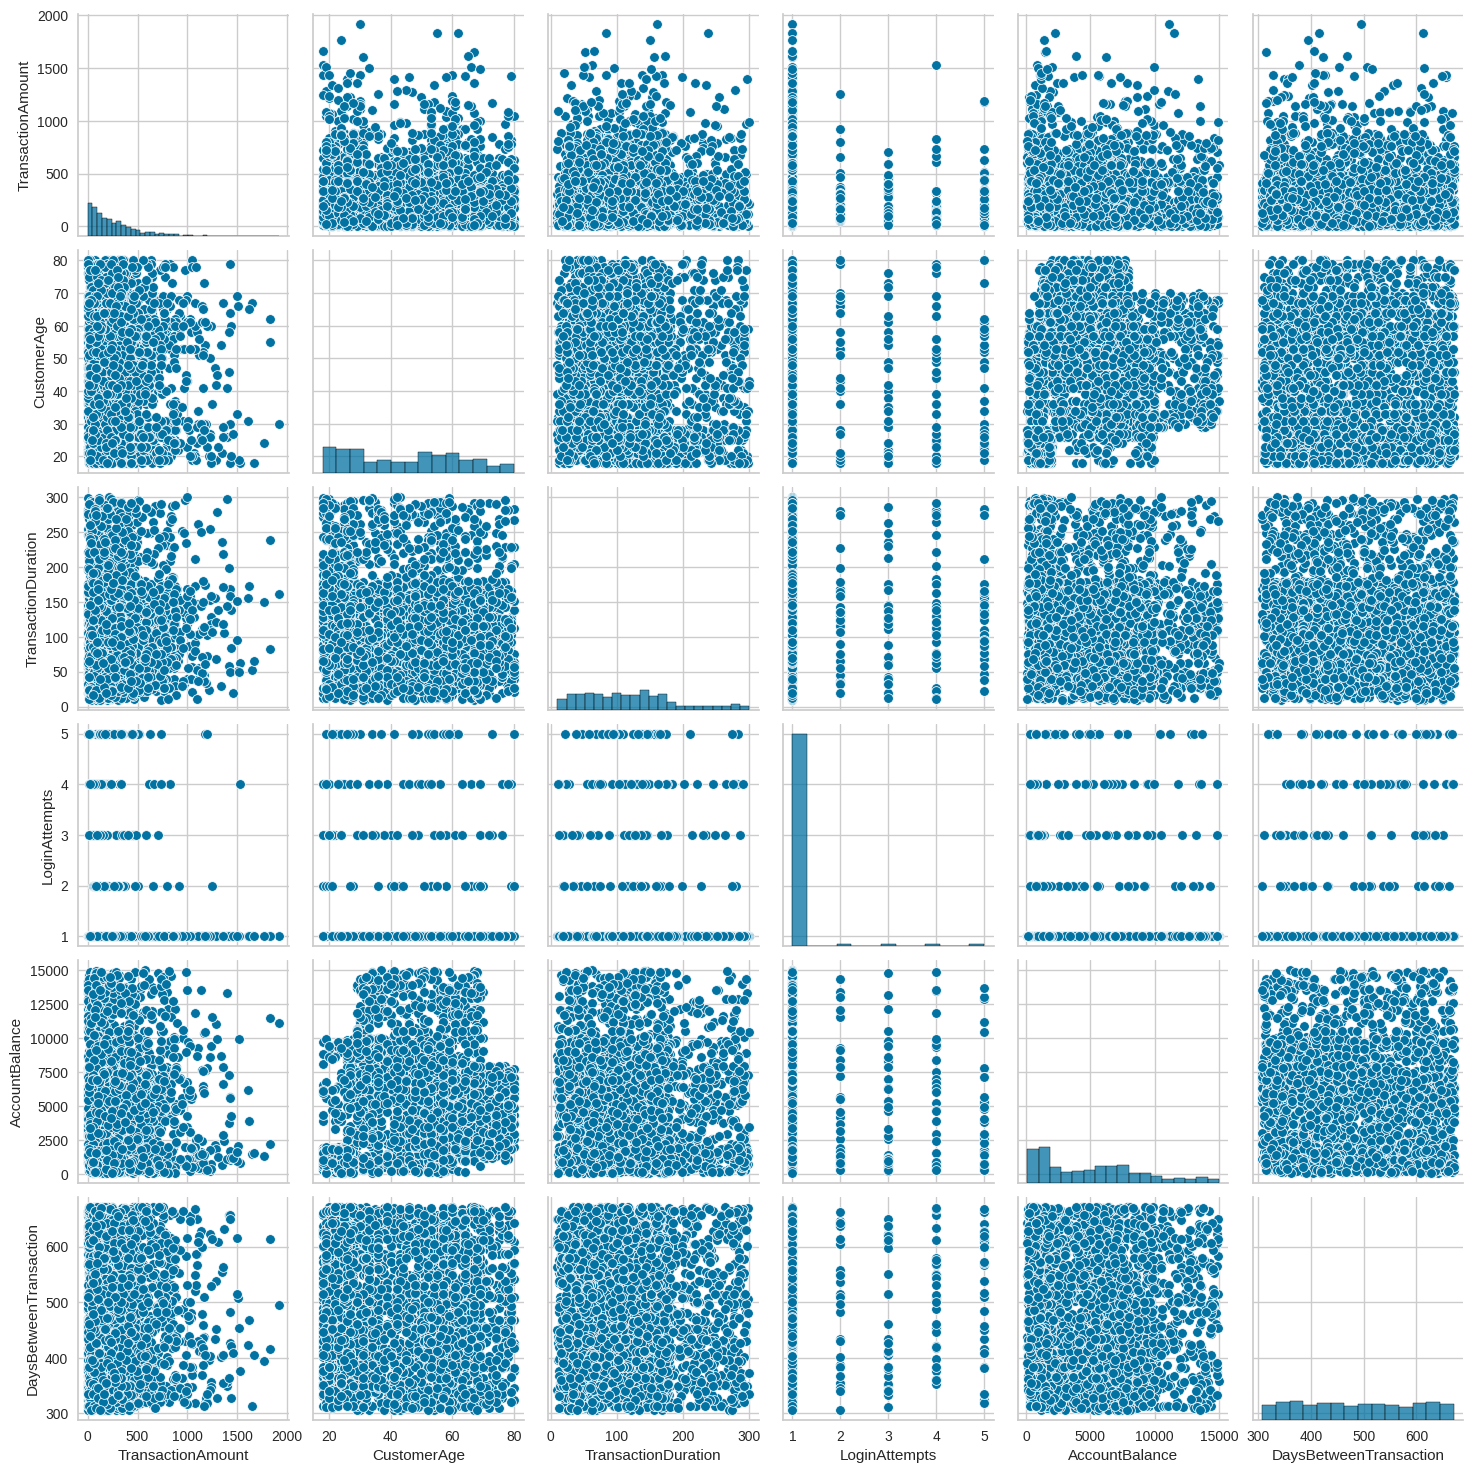

In [168]:
# Analisis Distribusi dan Korelasi

# Statistik deskriptif untuk variabel numerik
numerical_cols = df.select_dtypes(include=np.number).columns
print("\nStatistik Deskriptif Variabel Numerik:")
print(df[numerical_cols].describe())

# Visualisasi distribusi dengan histogram
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

# Visualisasi distribusi dengan boxplot
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

# Scatter plot untuk beberapa pasang variabel
sns.pairplot(df[numerical_cols])
plt.show()


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TransactionAmount       2512 non-null   float64
 1   TransactionType         2512 non-null   object 
 2   Location                2512 non-null   object 
 3   Channel                 2512 non-null   object 
 4   CustomerAge             2512 non-null   int64  
 5   CustomerOccupation      2512 non-null   object 
 6   TransactionDuration     2512 non-null   int64  
 7   LoginAttempts           2512 non-null   int64  
 8   AccountBalance          2512 non-null   float64
 9   DaysBetweenTransaction  2512 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 196.4+ KB


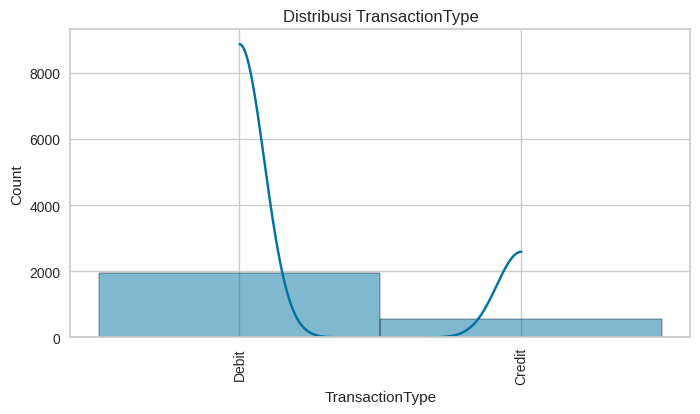

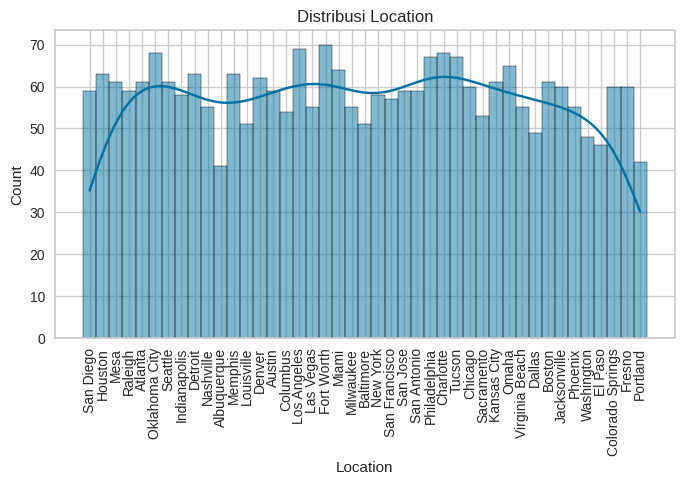

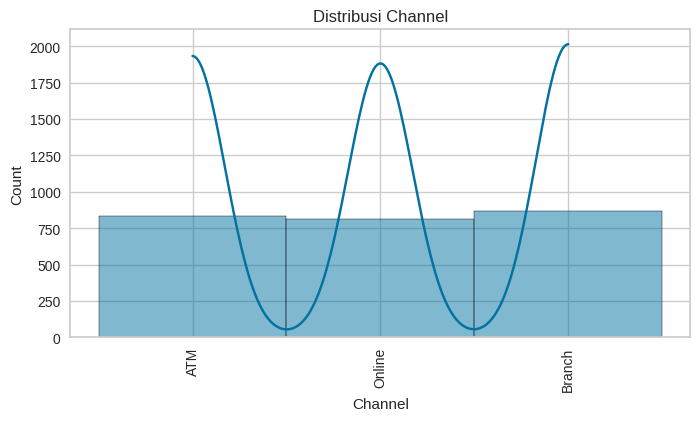

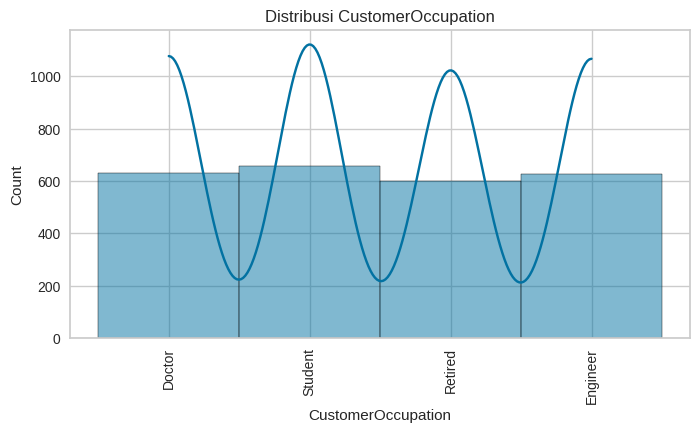

In [170]:
# Analisis distribusi variabel karegorik
categorical_features = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation',]
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribusi {feature}")
    plt.xticks(rotation=90)
    plt.show()

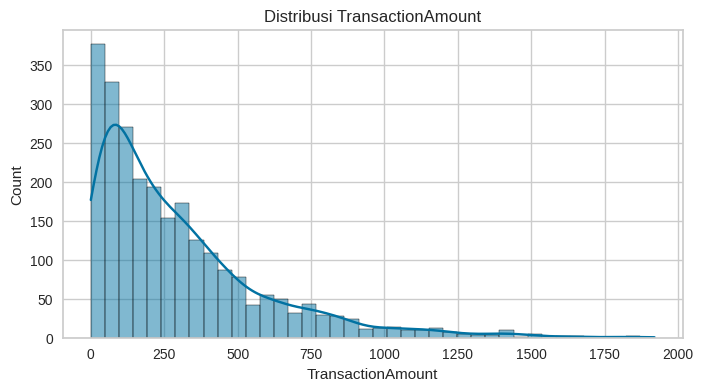

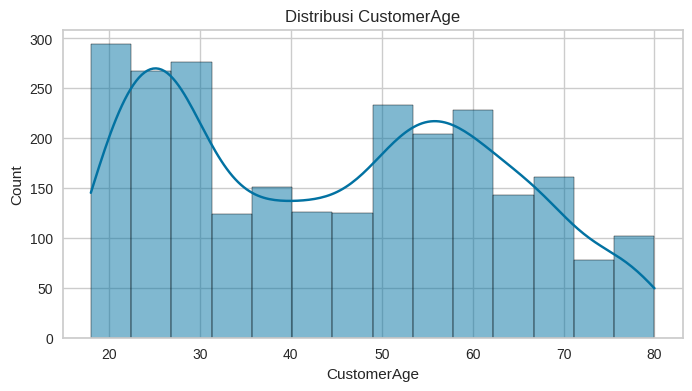

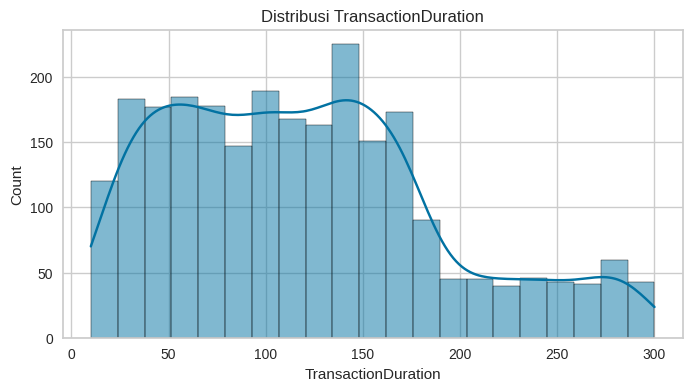

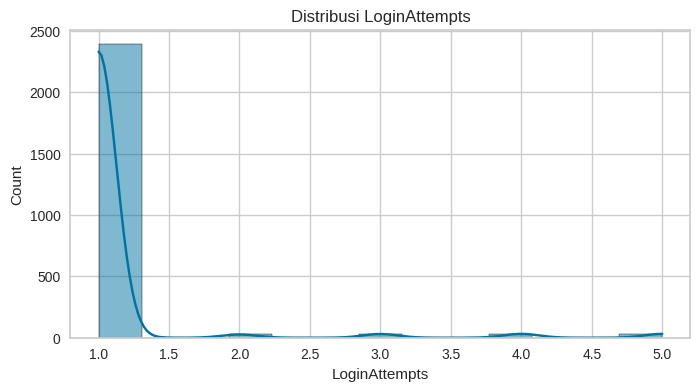

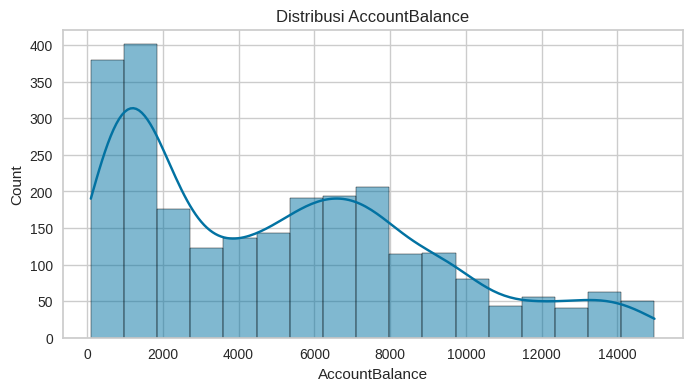

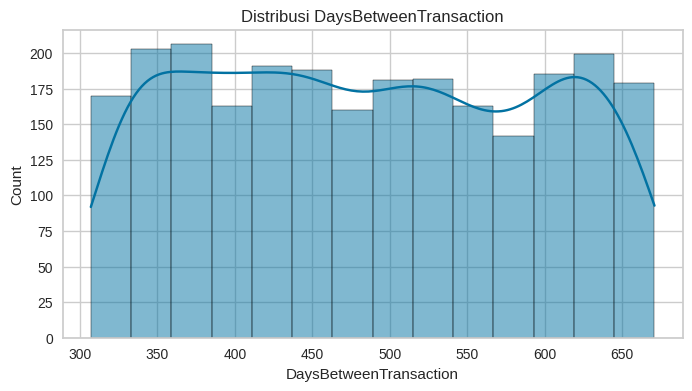

In [171]:
# Analisis distribusi variabel numerik
numerical_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration',
                     'LoginAttempts', 'AccountBalance', 'DaysBetweenTransaction']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribusi {feature}")
    plt.show()

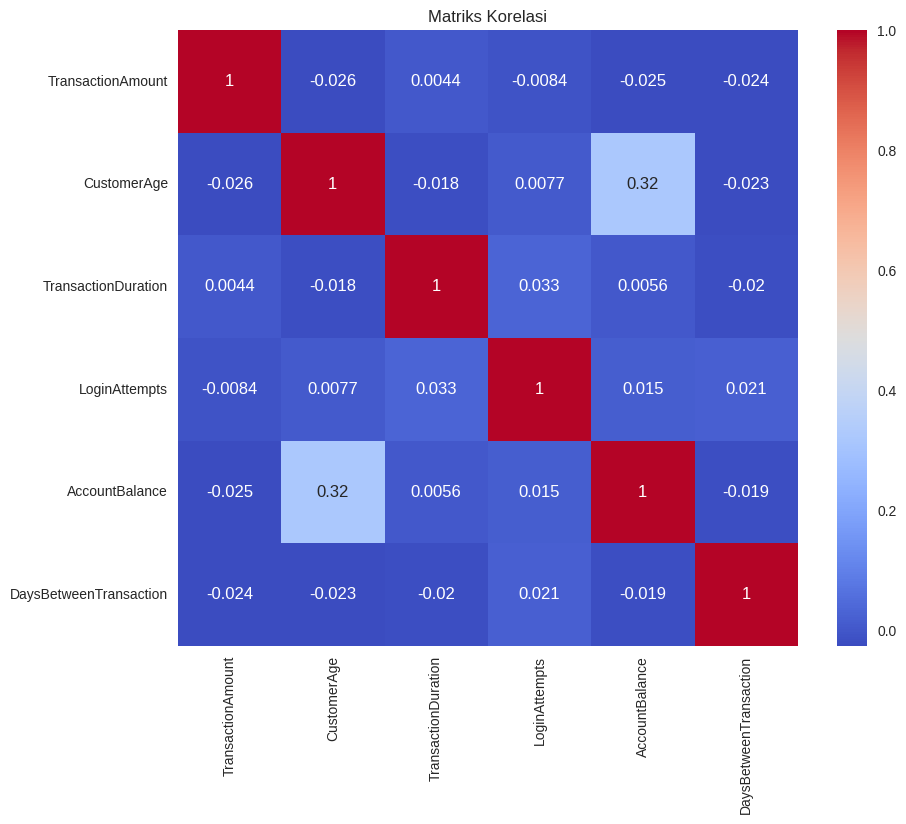

In [172]:
# Korelasi antar variabel numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi")
plt.show()

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TransactionAmount       2512 non-null   float64
 1   TransactionType         2512 non-null   object 
 2   Location                2512 non-null   object 
 3   Channel                 2512 non-null   object 
 4   CustomerAge             2512 non-null   int64  
 5   CustomerOccupation      2512 non-null   object 
 6   TransactionDuration     2512 non-null   int64  
 7   LoginAttempts           2512 non-null   int64  
 8   AccountBalance          2512 non-null   float64
 9   DaysBetweenTransaction  2512 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 196.4+ KB


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [174]:
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysBetweenTransaction
0,14.09,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,572
1,376.24,Debit,Houston,ATM,68,Doctor,141,1,13758.91,495
2,126.29,Debit,Mesa,Online,19,Student,56,1,1122.35,482
3,184.50,Debit,Raleigh,Online,26,Student,25,1,8569.06,548
4,13.45,Credit,Atlanta,Online,26,Student,198,1,7429.40,384


In [175]:
# Handle missing values (contoh: mengisi dengan median untuk numerik)
for col in numerical_features:
    df[col] = df[col].fillna(df[col].median())

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TransactionAmount       2512 non-null   float64
 1   TransactionType         2512 non-null   object 
 2   Location                2512 non-null   object 
 3   Channel                 2512 non-null   object 
 4   CustomerAge             2512 non-null   int64  
 5   CustomerOccupation      2512 non-null   object 
 6   TransactionDuration     2512 non-null   int64  
 7   LoginAttempts           2512 non-null   int64  
 8   AccountBalance          2512 non-null   float64
 9   DaysBetweenTransaction  2512 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 196.4+ KB


Outliers pada fitur CustomerAge: 0


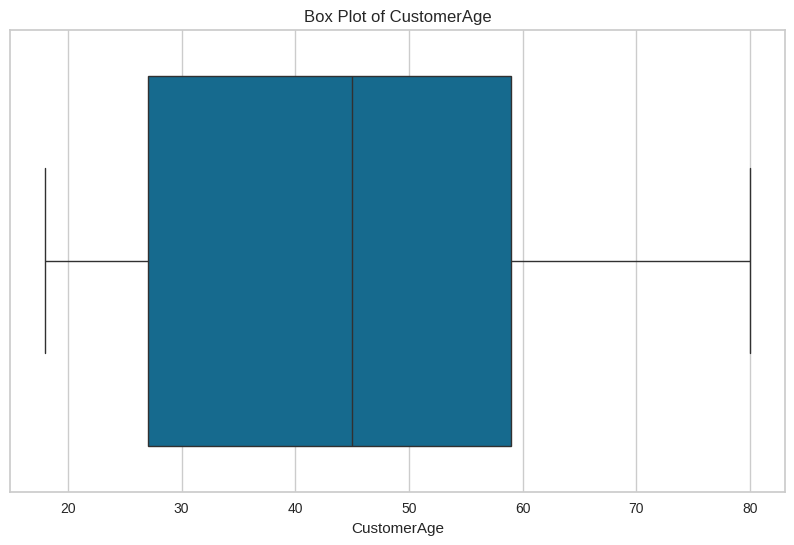

Outliers pada fitur TransactionDuration: 0


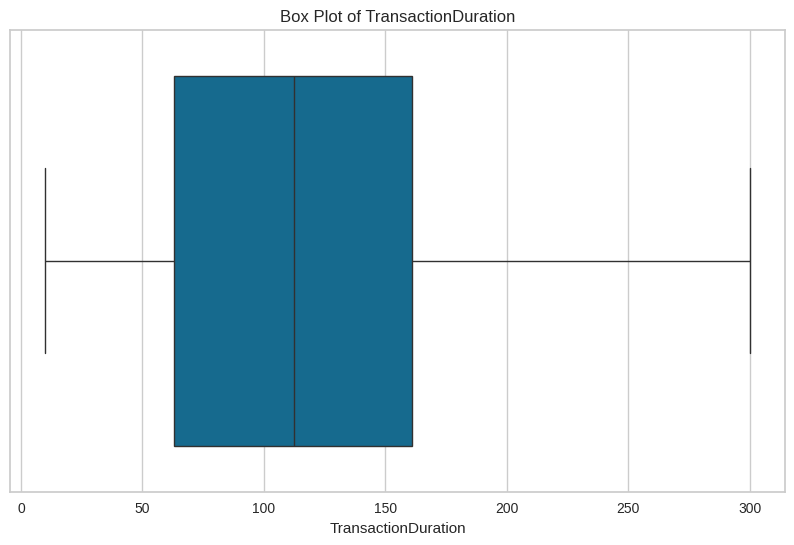

Outliers pada fitur AccountBalance: 0


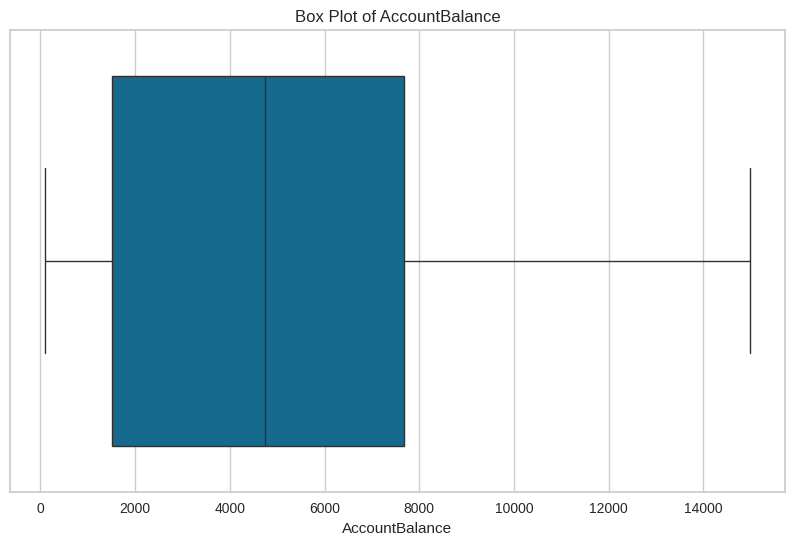

Outliers pada fitur DaysBetweenTransaction: 0


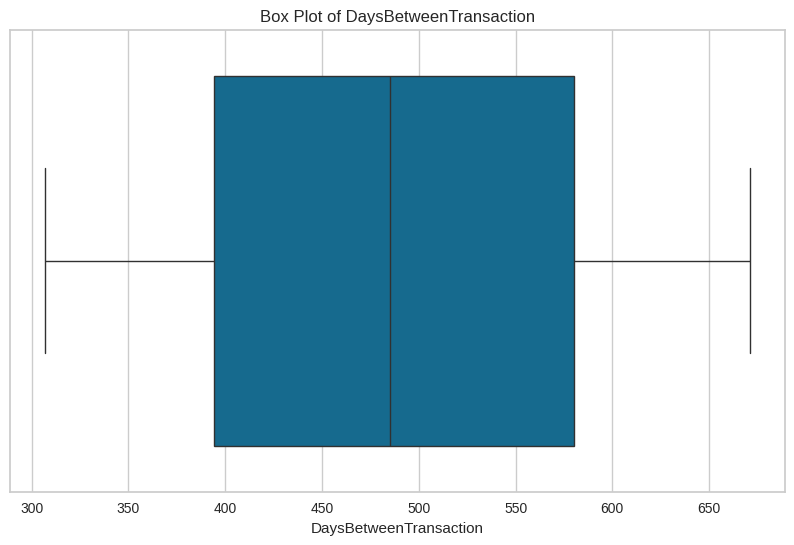

In [177]:
# Cek Outliers menggunakan IQR
selected_features = ['CustomerAge', 'TransactionDuration', 'AccountBalance', 'DaysBetweenTransaction']

for feature in selected_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    print(f"Outliers pada fitur {feature}: {len(outliers)}")

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TransactionAmount       2512 non-null   float64
 1   TransactionType         2512 non-null   object 
 2   Location                2512 non-null   object 
 3   Channel                 2512 non-null   object 
 4   CustomerAge             2512 non-null   int64  
 5   CustomerOccupation      2512 non-null   object 
 6   TransactionDuration     2512 non-null   int64  
 7   LoginAttempts           2512 non-null   int64  
 8   AccountBalance          2512 non-null   float64
 9   DaysBetweenTransaction  2512 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 196.4+ KB


In [179]:
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysBetweenTransaction
0,14.09,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,572
1,376.24,Debit,Houston,ATM,68,Doctor,141,1,13758.91,495
2,126.29,Debit,Mesa,Online,19,Student,56,1,1122.35,482
3,184.50,Debit,Raleigh,Online,26,Student,25,1,8569.06,548
4,13.45,Credit,Atlanta,Online,26,Student,198,1,7429.40,384


In [180]:
# Simpan objek LabelEncoder
encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    encoders[column] = le

In [181]:
# Normaliasasi data numerik
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [182]:
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysBetweenTransaction
0,-0.971275,1,36,0,1.423718,0,-0.552443,-0.206794,-0.000537,0.800526
1,0.269440,1,15,0,1.311287,0,0.305314,-0.206794,2.216472,0.076554
2,-0.586882,1,23,2,-1.443277,3,-0.909842,-0.206794,-1.023534,-0.045675
3,-0.387456,1,33,2,-1.049768,3,-1.353017,-0.206794,0.885797,0.574872
4,-0.973468,0,1,2,-1.049768,3,1.120184,-0.206794,0.593589,-0.967094


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [183]:
kmeans = KMeans(random_state=42)
# Tampilkan 5 baris pertama data dengan kolom Cluster
print(df.head())

   TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0          -0.971275                1        36        0     1.423718   
1           0.269440                1        15        0     1.311287   
2          -0.586882                1        23        2    -1.443277   
3          -0.387456                1        33        2    -1.049768   
4          -0.973468                0         1        2    -1.049768   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0                   0            -0.552443      -0.206794       -0.000537   
1                   0             0.305314      -0.206794        2.216472   
2                   3            -0.909842      -0.206794       -1.023534   
3                   3            -1.353017      -0.206794        0.885797   
4                   3             1.120184      -0.206794        0.593589   

   DaysBetweenTransaction  
0                0.800526  
1                0.076554  
2             

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [184]:
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysBetweenTransaction
0,-0.971275,1,36,0,1.423718,0,-0.552443,-0.206794,-0.000537,0.800526
1,0.269440,1,15,0,1.311287,0,0.305314,-0.206794,2.216472,0.076554
2,-0.586882,1,23,2,-1.443277,3,-0.909842,-0.206794,-1.023534,-0.045675
3,-0.387456,1,33,2,-1.049768,3,-1.353017,-0.206794,0.885797,0.574872
4,-0.973468,0,1,2,-1.049768,3,1.120184,-0.206794,0.593589,-0.967094


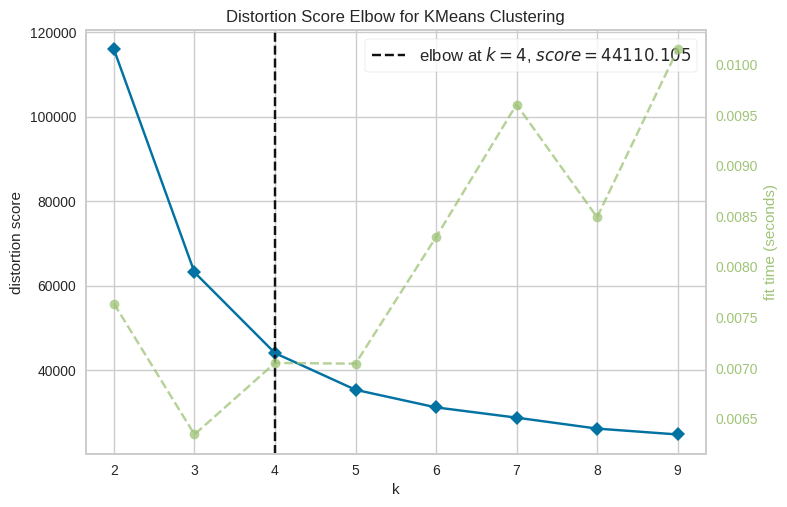

Jumlah Cluster Optimal (Elbow Method): 4


In [185]:
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

kmeans = KMeans(random_state=42)

# Gunakan Elbow Method untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(2, 10), metric='distortion')  # 'distortion' untuk inersia
visualizer.fit(df)  # Fit visualizer dengan data
visualizer.show()   # Tampilkan grafik Elbow
optimal_k = visualizer.elbow_value_  # Ambil nilai k optimal
print("Jumlah Cluster Optimal (Elbow Method):", optimal_k)

Silhouette Score untuk k=2: 0.5654493446863184
Silhouette Score untuk k=3: 0.48164630940156944
Silhouette Score untuk k=4: 0.4259742901953589
Silhouette Score untuk k=5: 0.3752945100074274
Silhouette Score untuk k=6: 0.323403147318953
Silhouette Score untuk k=7: 0.29239864206568467
Silhouette Score untuk k=8: 0.2515833439455042
Silhouette Score untuk k=9: 0.22757570939682453
Silhouette Score untuk k=10: 0.20541144804995787


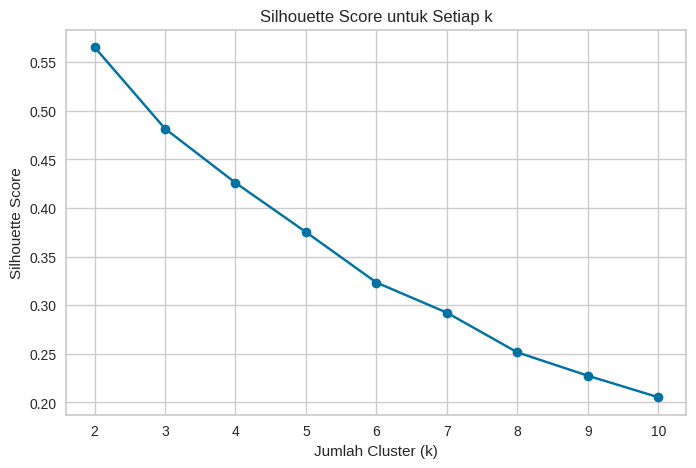

In [186]:
from sklearn.metrics import silhouette_score

# Hitung Silhouette Score untuk setiap k (dari 2 hingga 10)
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score untuk k={k}: {score}")

# Plot Silhouette Score untuk setiap k
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score untuk Setiap k')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [187]:
# Membangun model dengan k optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

df['Cluster'] = kmeans.fit_predict(df)

In [188]:
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysBetweenTransaction,Cluster
count,2.512000e+03,2512.000000,2512.000000,2512.000000,2.512000e+03,2512.000000,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2512.000000
mean,-1.414297e-16,0.773885,21.032643,0.991242,9.900078e-18,1.510350,7.637203e-17,1.527441e-16,4.985396e-17,1.785550e-16,1.431529
std,1.000199e+00,0.418398,12.253549,0.809100,1.000199e+00,1.129548,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.122562
min,-1.018657e+00,0.000000,0.000000,0.000000,-1.499493e+00,0.000000,-1.567456e+00,-2.067936e-01,-1.285344e+00,-1.691065e+00,0.000000
25%,-7.390118e-01,1.000000,11.000000,0.000000,-9.935526e-01,0.000000,-8.097706e-01,-2.067936e-01,-9.255845e-01,-8.730713e-01,0.000000
50%,-2.961881e-01,1.000000,21.000000,1.000000,1.832826e-02,1.500000,-1.021205e-01,-2.067936e-01,-9.712227e-02,-1.746824e-02,1.000000
75%,4.006114e-01,1.000000,31.000000,2.000000,8.053467e-01,3.000000,5.912336e-01,-2.067936e-01,6.575405e-01,8.757437e-01,2.000000
max,5.555266e+00,1.000000,42.000000,2.000000,1.985874e+00,3.000000,2.578372e+00,6.431745e+00,2.529043e+00,1.731347e+00,3.000000


In [189]:
# Evaluasi final model
beginning_silhouette_avg = silhouette_score(df, df['Cluster'])
print(f"beginning Silhouette Score with optimal k={visualizer.elbow_value_}: {beginning_silhouette_avg}")

beginning Silhouette Score with optimal k=4: 0.4388345437241901


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [190]:
from sklearn.decomposition import PCA

# Lakukan PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

# Membangun model dengan k optimal pada data hasil PCA
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = kmeans_pca.fit_predict(df_pca)

# Evaluasi clustering hasil PCA
silhouette_avg_pca = silhouette_score(df_pca, df_pca['Cluster'])
print(f"Silhouette Score before PCA: {beginning_silhouette_avg}")
print(f"Silhouette Score after PCA: {silhouette_avg_pca}")

Silhouette Score before PCA: 0.4388345437241901
Silhouette Score after PCA: 0.542992712147779


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

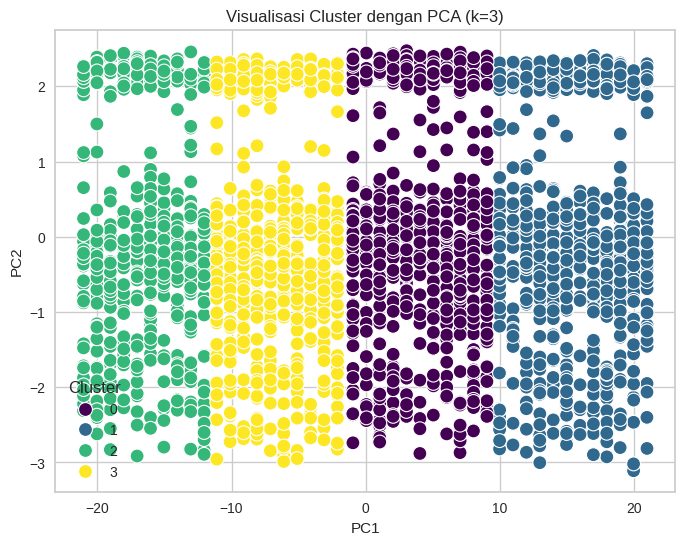

In [191]:
# Lakukan PCA untuk mengurangi dimensi data menjadi 2 komponen utama
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

# Buat DataFrame dari hasil PCA
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']  # Tambahkan kolom Cluster

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=100)
plt.title('Visualisasi Cluster dengan PCA (k=3)')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

In [192]:

# Deskripsi Cluster
cluster_descriptions = []
for cluster_label in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_label]
    description = {
        'Cluster Label': cluster_label,
        'Ukuran Cluster': len(cluster_data),
        'Rata-rata TransactionAmount': cluster_data['TransactionAmount'].mean(),
        'Rata-rata CustomerAge': cluster_data['CustomerAge'].mean(),
    }

    for col in categorical_features:
        mode = cluster_data[col].mode().iloc[0]
        description[f'Modus {col}'] = mode

    cluster_descriptions.append(description)

cluster_df = pd.DataFrame(cluster_descriptions)
print(cluster_df)

   Cluster Label  Ukuran Cluster  Rata-rata TransactionAmount  \
0              0             676                    -0.018709   
1              1             674                     0.026571   
2              2             564                    -0.016203   
3              3             598                     0.006483   

   Rata-rata CustomerAge  Modus TransactionType  Modus Location  \
0              -0.003376                      1              20   
1              -0.055736                      1              40   
2               0.049028                      1               5   
3               0.020396                      1              13   

   Modus Channel  Modus CustomerOccupation  
0              1                         3  
1              2                         3  
2              1                         2  
3              1                         0  


### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [193]:
# Untuk kolom numerik, hanya perlu melakukan inverse transform scaler
df[numerical_features] = scaler.inverse_transform(df[numerical_features])

In [194]:
# label encoding invers
for column in categorical_features:
    df[column] = encoders[column].inverse_transform(df[column])

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [195]:
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,DaysBetweenTransaction,Cluster
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,572.0,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,495.0,3
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,482.0,0
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,548.0,1
4,13.45,Credit,Atlanta,Online,26.0,Student,198.0,1.0,7429.40,384.0,2


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [196]:
# Analisis karakteristik tiap cluster
for cluster_label in df['Cluster'].unique():
    print(f"\nKarakteristik Cluster {cluster_label}:")
    cluster_data = df[df['Cluster'] == cluster_label]
    for col in df.columns:
        if col != 'Cluster':
            if pd.api.types.is_numeric_dtype(df[col]):
                print(f"- {col}: Rata-rata={cluster_data[col].mean():.2f}, Min={cluster_data[col].min():.2f}, Max={cluster_data[col].max():.2f}")
            else:  # Kolom kategorikal
                print(f"- {col}:")
                print(cluster_data[col].value_counts(normalize=True) * 100) # Proporsi setiap kategori



Karakteristik Cluster 1:
- TransactionAmount: Rata-rata=305.35, Min=1.41, Max=1919.11
- TransactionType:
TransactionType
Debit     76.11276
Credit    23.88724
Name: proportion, dtype: float64
- Location:
Location
Tucson            9.940653
Seattle           9.050445
San Diego         8.753709
Raleigh           8.753709
San Jose          8.753709
San Antonio       8.753709
San Francisco     8.456973
Virginia Beach    8.160237
Phoenix           8.160237
Sacramento        7.863501
Washington        7.121662
Portland          6.231454
Name: proportion, dtype: float64
- Channel:
Channel
Online    34.124629
Branch    33.531157
ATM       32.344214
Name: proportion, dtype: float64
- CustomerAge: Rata-rata=43.68, Min=18.00, Max=80.00
- CustomerOccupation:
CustomerOccupation
Student     26.854599
Doctor      26.112760
Engineer    25.519288
Retired     21.513353
Name: proportion, dtype: float64
- TransactionDuration: Rata-rata=117.12, Min=10.00, Max=296.00
- LoginAttempts: Rata-rata=1.09, Min=1.

Berdasarkan analisis di atas, kita dapat mengamati beberapa pola pada cluster:

### Pola pada Cluster 0

- **Pelanggan dewasa**: Cluster 0 memiliki rata-rata usia pelanggan yang lebih tua (52,60 tahun).
- **Transaksi debit lebih umum**: Cluster 0 memiliki proporsi transaksi debit yang lebih tinggi (76,704855%).
- **Saldo rekening yang lebih tinggi**: Cluster 0 memiliki rata-rata saldo rekening yang lebih tinggi (6431,19).
- **Distribusi pekerjaan yang beragam**: Cluster 0 memiliki distribusi pekerjaan yang lebih beragam, dengan dokter, insinyur, dan pensiunan sebagai profesi yang paling umum.

### Pola pada Cluster 1

- **Pelanggan muda**: Cluster 1 memiliki rata-rata usia pelanggan yang lebih muda (23,27 tahun).
- **Transaksi debit masih umum**: Cluster 1 memiliki proporsi transaksi debit yang masih tinggi (79,234168%).
- **Saldo rekening yang lebih rendah**: Cluster 1 memiliki rata-rata saldo rekening yang lebih rendah (1559,30).
- **Distribusi pekerjaan yang didominasi oleh mahasiswa**: Cluster 1 memiliki distribusi pekerjaan yang didominasi oleh mahasiswa (96,759941%).

Dengan memahami pola-pola ini, kita dapat mengembangkan strategi pemasaran dan layanan yang lebih efektif untuk memenuhi kebutuhan

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

---

## **Cluster 0**

### Karakteristik:
- **Rata-rata Transaction Amount**: 290.37 (Min=0.32, Max=1919.11)
- **Transaction Type**:
  - Debit: 76.70%
  - Credit: 23.30%
- **Location**: Distribusi lokasi yang merata, dengan proporsi tertinggi di Chicago (4.96%) dan Tucson (2.84%).
- **Channel**:
  - Branch: 34.70%
  - ATM: 32.95%
  - Online: 32.35%
- **Rata-rata Customer Age**: 52.60 (Min=26, Max=80)
- **Customer Occupation**:
  - Doctor: 34.42%
  - Engineer: 32.90%
  - Retired: 32.68%
- **Rata-rata Transaction Duration**: 119.38 (Min=10, Max=300)
- **Rata-rata Login Attempts**: 1.13 (Min=1, Max=5)
- **Rata-rata Account Balance**: 6431.19 (Min=120.89, Max=14977.99)
- **Rata-rata Days Between Transaction**: 486.24 (Min=307, Max=671)

### Analisis:
Cluster ini terdiri dari pelanggan dewasa dengan rata-rata usia 52.60 tahun. Mereka memiliki saldo rekening yang relatif tinggi (rata-rata 6431.19) dan cenderung melakukan transaksi debit (76.70%). Profesi dominan adalah dokter, insinyur, dan pensiunan. Pelanggan dalam cluster ini menggunakan berbagai channel (Branch, ATM, dan Online) secara seimbang. Aktivitas transaksi mereka stabil dengan jarak antar transaksi yang cukup lama (rata-rata 486.24 hari).

---

## **Cluster 1**

### Karakteristik:
- **Rata-rata Transaction Amount**: 317.08 (Min=0.26, Max=1762.28)
- **Transaction Type**:
  - Debit: 79.23%
  - Credit: 20.77%
- **Location**: Distribusi lokasi yang merata, dengan proporsi tertinggi di Chicago (4.27%) dan Los Angeles (3.68%).
- **Channel**:
  - Branch: 34.17%
  - ATM: 33.73%
  - Online: 32.11%
- **Rata-rata Customer Age**: 23.27 (Min=18, Max=34)
- **Customer Occupation**:
  - Student: 96.76%
  - Engineer: 3.24%
- **Rata-rata Transaction Duration**: 120.36 (Min=11, Max=299)
- **Rata-rata Login Attempts**: 1.11 (Min=1, Max=5)
- **Rata-rata Account Balance**: 1559.30 (Min=101.25, Max=9963.39)
- **Rata-rata Days Between Transaction**: 488.54 (Min=310, Max=671)

### Analisis:
Cluster ini didominasi oleh pelanggan muda dengan rata-rata usia 23.27 tahun. Mereka memiliki saldo rekening yang relatif rendah (rata-rata 1559.30) dan cenderung melakukan transaksi debit (79.23%). Profesi dominan adalah mahasiswa (96.76%). Penggunaan channel transaksi (Branch, ATM, dan Online) juga seimbang. Meskipun jarak antar transaksi cukup lama (rata-rata 488.54 hari), mereka menunjukkan aktivitas transaksi yang cukup aktif.

---

### Kesimpulan:
Dengan memahami karakteristik masing-masing cluster, kita dapat mengembangkan strategi pemasaran dan layanan yang lebih efektif. Misalnya:
- **Cluster 0**: Fokus pada layanan premium dan produk investasi untuk pelanggan dewasa dengan saldo tinggi.
- **Cluster 1**: Menyediakan layanan digital yang ramah pengguna dan program loyalitas untuk menarik pelanggan muda.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [197]:
# save file to csv
data = pd.DataFrame(df)
data.to_csv('data_cluster.csv', index=False)